We will be taking a look at the LOGISTIC REGRESSION.
Given a set of data points, classified as people who will get placed and who will not get placed, given variables IQ and CGPA

In [230]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [231]:
#Hypercube=False means features are correlated and are distributed over a sphere

In [232]:
import matplotlib.pyplot as plt

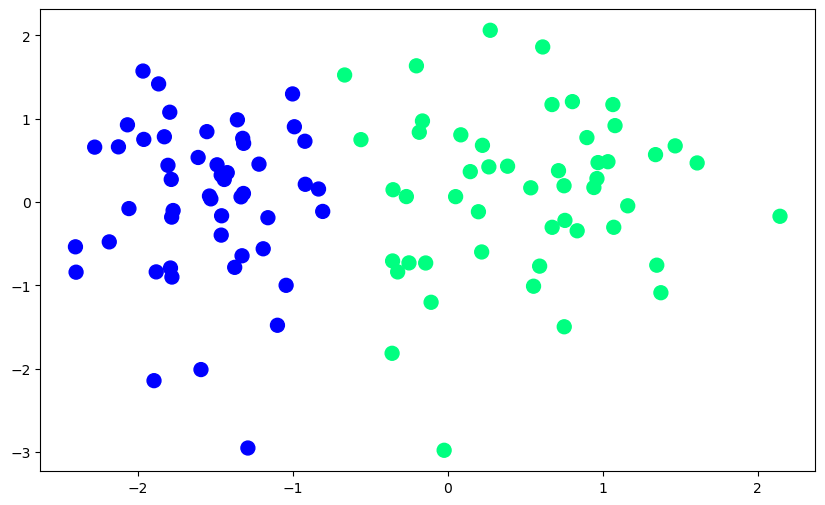

In [233]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

Here it is easy to look at and classify the classes. SO the brute force method will be to construct a line
Ax_1 + Bx_2 + C=0
We will start with random variables, and whenever an abnormal point is encountered we make sure the line equation is changed accordingly
The abnormal point will pull the line toward it
To prevent drastic transformation in lines, we introduce a learning rate.

In [234]:
#Defining our own function

def perceptron(X,y):

    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat= step(np.dot(X[j], weights))
        weights = weights+ lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:] 

In [235]:
def step(z):
    return 1 if z>0 else 0

In [236]:
intercept_, coeff=perceptron(X,y)

In [237]:
print(coeff)
print(intercept_)

[1.33438876 0.04856434]
0.9


In [238]:
m=-(coeff[0]/coeff[1])
b=-(intercept_/coeff[1])

In [239]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

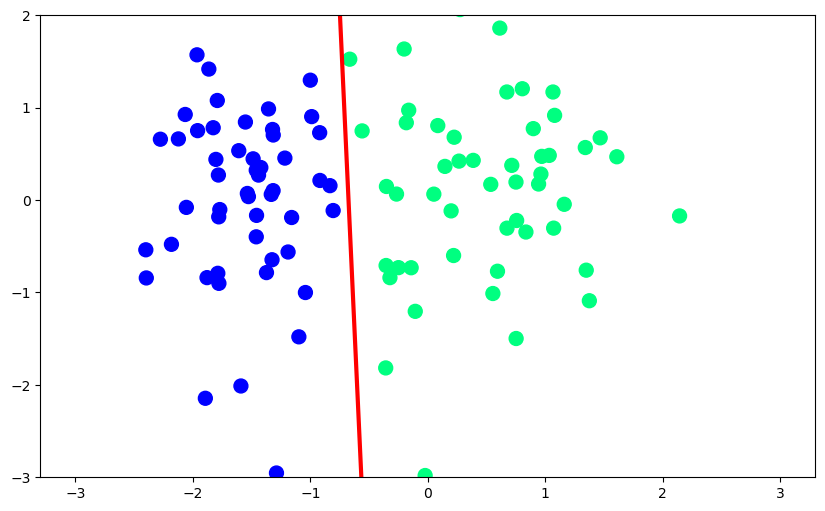

In [240]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
#Zooming it up
plt.ylim(-3,2)

Seems like a pretty decent classification line right?
But guess what, its not at all optimal
This line may give us a good result in the training model, but for the testing, it may behave abnormally.
Now we will take a look at the main Logistic Regreesion function and compare it with ours and in case of ambiguity we will modify our function

In [241]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [242]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])

In [243]:
x_input1 = np.linspace(-3,3,100)
y_input1 = x_input1*m + b

(-3.0, 2.0)

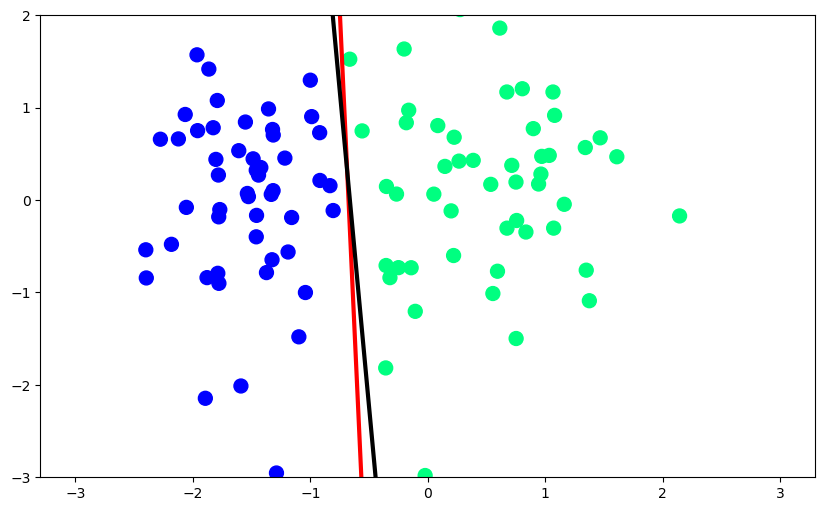

In [244]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black', linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Here you will notice that our red line works but is not optimized as the black logistic regression line model.
Therefore there is a scope for improvement.

We will now enhance our logic, rather than just the abnormal points pulling the line, we will ensure that the correctly allocated points push the line with a magnitude inversely proportional to their distance from the line.

Using the Sigmoid function derived from probabilistic analysis (If you want to know about this, please feel free to contact me, I'll surely explain it to you in detail)

In [309]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=1.50)

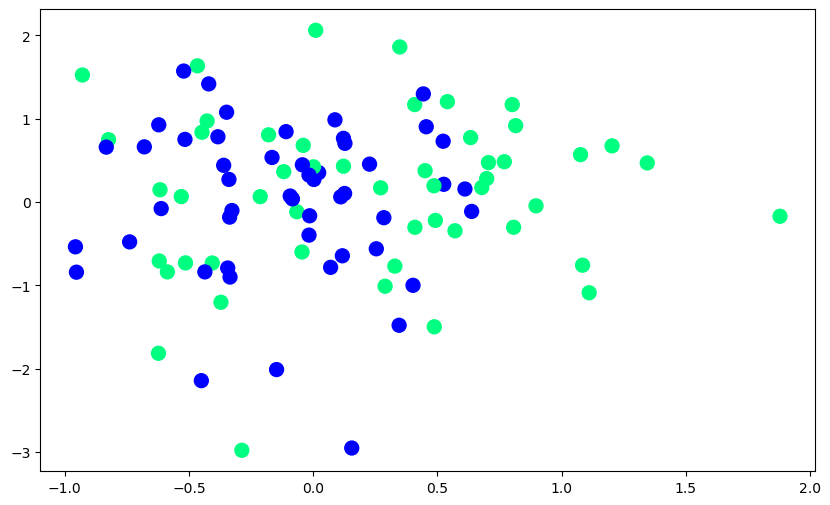

In [310]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [311]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(X[j],weights))
        weights= weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [312]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [313]:
intercept_,coef_=perceptron(X,y)

In [314]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [315]:
x_input2=np.linspace(-3,3,100)
y_input2=m*x_input2+b

(-3.0, 2.0)

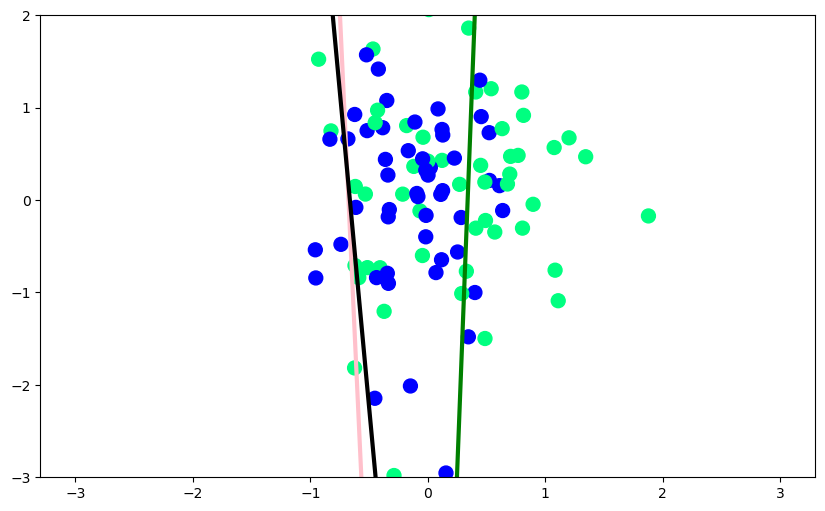

In [316]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='pink',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='green',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Look now our model does look a bit like the logistic regression model, right?
From Pink -> Green now we aim for more accuracy, hence as any ML algo says, we need to find the loss function for our model
That here is the Gradient Descent.

In [317]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [318]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])

In [319]:
x_input10 = np.linspace(-3,3,100)
y_input10 = x_input1*m + b

In [320]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights+lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[0],weights[1:]

In [321]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [322]:
intercept_,coef_=gd(X,y)

In [323]:
m1=-(coef_[0]/coef_[1])
b1=-(intercept_/coef_[1])

In [324]:
x_input3=np.linspace(-3,3,100)
y_input3=m1*x_input3 + b1

(-3.0, 2.0)

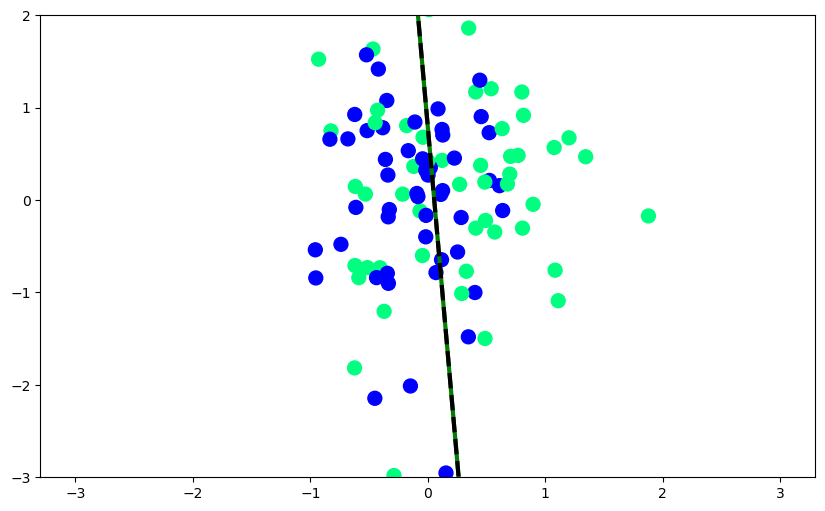

In [325]:
#Finally plotting our model with the regression
plt.figure(figsize=(10,6))
plt.plot(x_input3,y_input3,color='green',linewidth=3)
plt.plot(x_input10,y_input10,color='black', linestyle='--',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Now our model plot coincides with the linear regression model, violaaaaaa!
You just made your very own Linear Regression Model, name it "your name" regression.